<a href="https://colab.research.google.com/github/sudershan1993/AIML/blob/main/Sales_predection_regressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
from pandas import read_csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
dataset = read_csv('/content/sample_data/Advertising.csv')



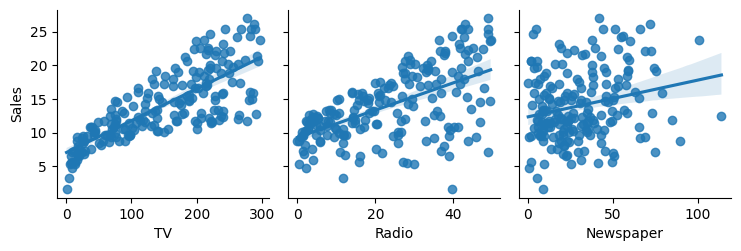

In [27]:

sns.pairplot(data=dataset,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='reg')


In [8]:
print(dataset.shape)
print(dataset.head(5))
print(dataset.columns)
print(dataset.info())
print(dataset.describe().T)


(200, 4)
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9
Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
           count      mean        std  min     25%     50%      75%    max
TV         200.0  147.0425  85.854236  0.7  74.375  149.75  218.825  296.4
Radio      200.0   23.2640  14.846809  0.0   9.975   22.90   36.525   49.6
Newspaper  200.0   30.5540  21.778621  0.3  12.750   25.75   45.100  114.0
Sales      200.0   14.0225   5.217457

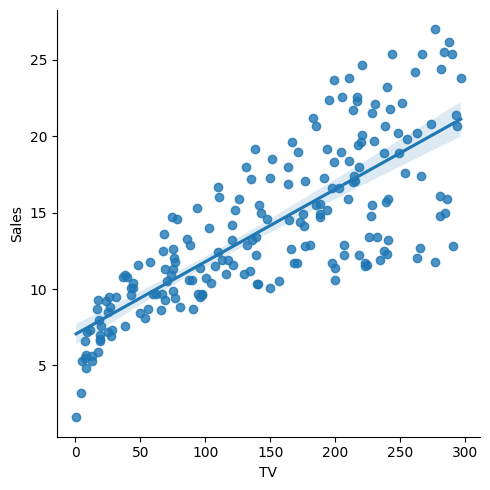

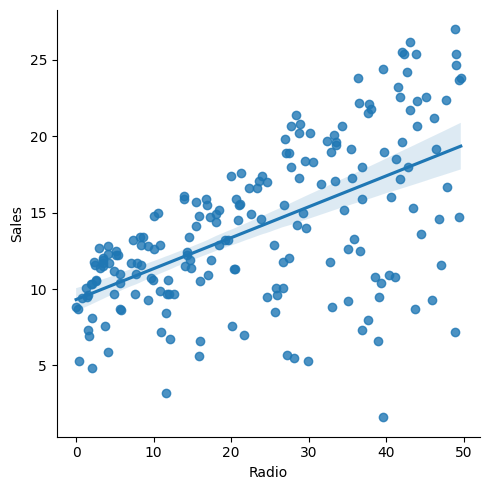

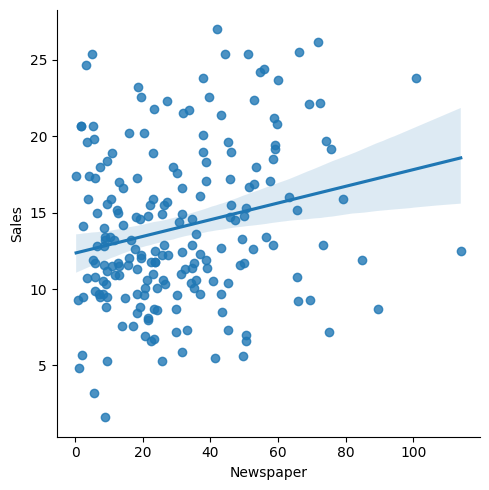

In [28]:
# Linear regression plots to visualize the relationship between each independent variable and the dependent variable
sns.lmplot(x='TV', y='Sales', data=dataset)
sns.lmplot(x='Radio', y='Sales', data=dataset)
sns.lmplot(x='Newspaper',y= 'Sales', data=dataset)

<Axes: xlabel='Radio', ylabel='Sales'>

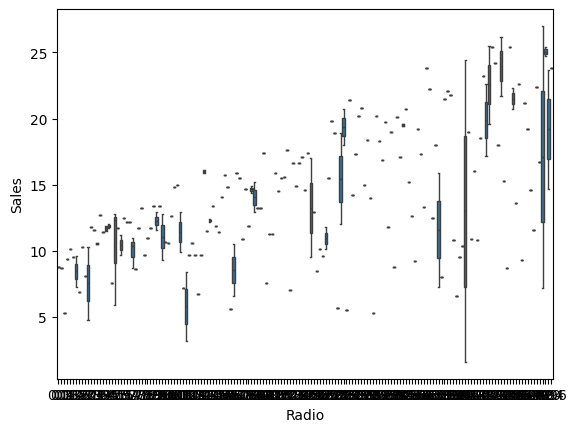

In [17]:
sns.boxplot(x='Radio', y='Sales', data=dataset)

In [12]:
array = dataset.values
inputx = array[:,0:3]
outputy = array[:,3]
input_train, input_test, output_train, output_test = train_test_split(inputx, outputy, test_size =0.25, random_state = 7)
model = LinearRegression()
#print("\nThe parameters of the model are\n\n",model.get_params())
print("\nThe model we are using is ", model.fit(input_train, output_train))


The model we are using is  LinearRegression()


In [ ]:
tv_Budget = float(input("\nWhats the TV Budget"))
radio_Budget = float(input("\nWhats the Radio Budget"))
newsPaper_Budget = float(input("\nWhats the NewsPaper Budget"))
# Collect inputs into a list first
InputList = [tv_Budget, radio_Budget,newsPaper_Budget]
testinput = np.array([InputList])
predicted_output = model.predict(testinput)
print('\nThe input is',InputList)
print('\nThe Sales for the input is ',predicted_output)


Whats the TV Budget230.1

Whats the Radio Budget37.8

Whats the NewsPaper Budget69.2

The input is [230.1, 37.8, 69.2]

The Sales for the input is  [13.28141432]


In [13]:
print("\nThe test input for number of Sales units is as follows \n")
print(input_test[:10])
# model predicting the Test set results
predicted_output = model.predict(input_test)
print("\nThe output (Sales units) for the test input is as follows \n")
print(predicted_output)
mse = mean_squared_error(output_test, predicted_output)
rmse = np.sqrt(mse)  # manually take square root
mae = mean_absolute_error(output_test, predicted_output)
r2 = r2_score(output_test, predicted_output)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 score:", r2)


The test input for number of Sales units is as follows 

[[ 76.3  27.5  16. ]
 [141.3  26.8  46.2]
 [ 13.2  15.9  49.6]
 [214.7  24.    4. ]
 [ 38.2   3.7  13.8]
 [ 17.2  45.9  69.3]
 [ 18.8  21.7  50.4]
 [107.4  14.   10.9]
 [ 31.5  24.6   2.2]
 [102.7  29.6   8.4]]

The output (Sales units) for the test input is as follows 

[11.46152578 14.37422244  6.32339413 17.28886103  5.20329537 12.14843077
  7.67584543 10.38160984  8.81798137 13.09349415  3.40652236 12.63462935
  9.60036716  7.69946607 18.73131344  5.09069459  8.00503663 16.88885386
 18.20474689  8.78065182 16.11452227 19.63286959  8.68945404 17.34033515
  9.64838754 18.0313174  23.42453876 12.75950824 19.74082171 12.15775995
 12.70810717  5.95616914 14.20158313 20.80239648 19.5393137  15.22637593
 10.39315045 24.27270266 11.31558656 11.92734342  7.76471375 22.24998838
  5.6003345  13.6644326  17.10614165 16.39656001 15.15034356  8.28572685
 11.27716398 15.48319544]
MSE: 2.4626045763794977
RMSE: 1.569268803098914
MAE: 1.18812